In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def map_data(data, keys, pred, group, column):
    table = data[pred(data[keys]) == True]
    table = table.groupby(group)[column].nunique()
    
    none = data[pred(data[keys]) == False][column].count()
   
    labels = [*table.index.array, *['None']]
    values = [*table.tolist(), *[none]]
    
    return [labels, values]

In [3]:
def drawPie(values, labels=[], normalize=True):
    fig, ax = plt.subplots()
    ax.pie(values,normalize=normalize)
    ax.legend(labels,loc='upper left', bbox_to_anchor=(1.1,1))
    plt.show()

In [4]:
def norm(x,p):
    v = np.array(x)
    return v / (sum(v ** p) ** (1/p))
    #return (v - v.min()) / (v.max() - v.min())

In [17]:
def toDataFrame(labels, values):
    return pd.DataFrame({'House' : labels, 'Battles': values})

In [7]:
data = pd.read_csv('GoT/battles.csv',header=0)

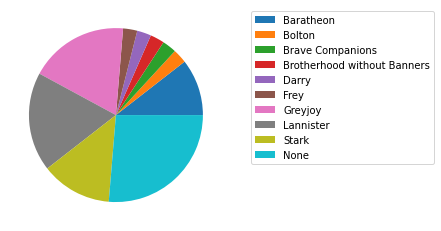

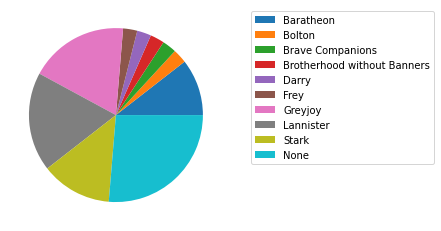

                         House  Battles
0                    Baratheon        4
1                       Bolton        1
2             Brave Companions        1
3  Brotherhood without Banners        1
4                        Darry        1
5                         Frey        1
6                      Greyjoy        7
7                    Lannister        7
8                        Stark        5
9                         None       10


In [19]:
labels, values = map_data(
    data, 
    keys = [f'attacker_{i}' for i in range(1,5)],
    pred = lambda x: x.count(axis='columns') == 1,
    group = 'attacker_1',
    column = 'name'
)

drawPie(values, labels)
drawPie(norm(values,1), labels, normalize=False) #нормолизация вручную
print(toDataFrame(labels,values))